### Importación de librerías necesarias

In [35]:
import subprocess
process = subprocess.Popen(
    ["pip", "install", "opencv-python-headless", "--verbose"],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True
)
#Muestro cada línea a medida que se genera
for line in process.stdout:
    print(line, end="")


import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageEnhance
from collections import Counter
import random

from tqdm import tqdm
from math import ceil
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics.pairwise import cosine_distances

Using pip 25.1 from C:\Users\Nitropc\anaconda3\envs\tf_gpu\lib\site-packages\pip (python 3.10)


### Convertir imagen (target) a escala de grises

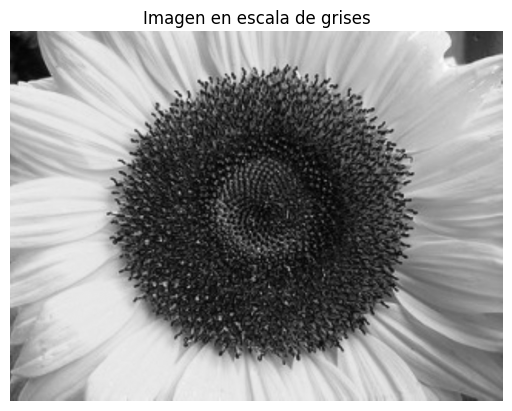

La imagen en escala de grises se ha guardado en: fotoGris.jpg


In [27]:
# Ruta de la imagen original
input_path = "foto.jpg"
# Ruta para guardar la imagen en escala de grises
output_path = "fotoGris.jpg"

# Abrir la imagen
with Image.open(input_path) as img:
    # Convertir a escala de grises
    gray_img = img.convert("L")
    # Guardar la imagen en escala de grises
    gray_img.save(output_path)

    # Mostrar la imagen en escala de grises
    plt.imshow(gray_img, cmap="gray")
    plt.axis("off")
    plt.title("Imagen en escala de grises")
    plt.show()

print(f"La imagen en escala de grises se ha guardado en: {output_path}")


### Convertir imágenes (tiles) a escala de grises

Todas las imágenes se han convertido y guardado en: ./fotosGris/


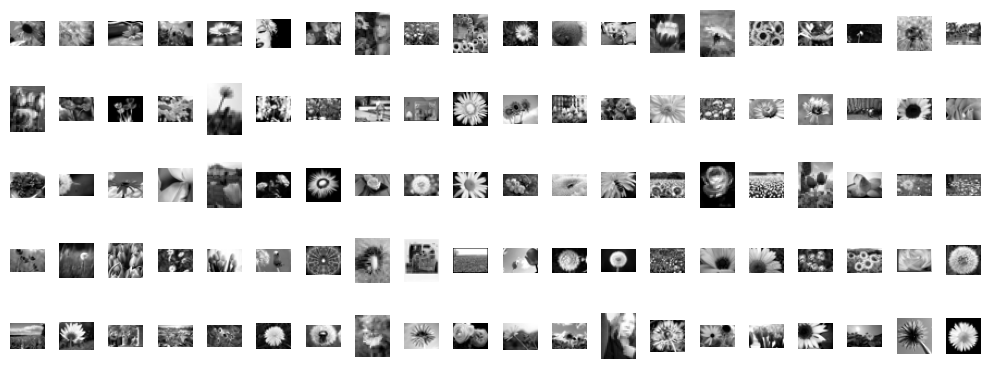

In [29]:
# Directorio de las imágenes de entrada y salida
input_dir = "./fotos/"
output_dir = "./fotosGris/"

# Crear la carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Lista para miniaturas
preview_images = []

# Recorrer y procesar imágenes
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        input_path = os.path.join(input_dir, file_name)
        base_name, ext = os.path.splitext(file_name)

        with Image.open(input_path) as img:
            gray_img = img.convert("L")
            output_path = os.path.join(output_dir, f"{base_name}_gray{ext}")
            gray_img.save(output_path)

            # Miniatura más legible (32x32 píxeles)
            if len(preview_images) < 100:
                thumbnail = gray_img.copy()
                thumbnail.thumbnail((32, 32))  # Ajustado para mejor visibilidad
                preview_images.append(thumbnail)

print(f"Todas las imágenes se han convertido y guardado en: {output_dir}")

# Mostrar miniaturas
if preview_images:
    cols = 20
    rows = (len(preview_images) + cols - 1) // cols
    plt.figure(figsize=(10, rows * 0.8))

    for idx, thumb in enumerate(preview_images):
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(thumb, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron imágenes válidas.")


### Recortar imagenes (tiles) grises a forma cuadrada

Todas las imágenes se han convertido a cuadradas y guardado en: ./fotosGris/


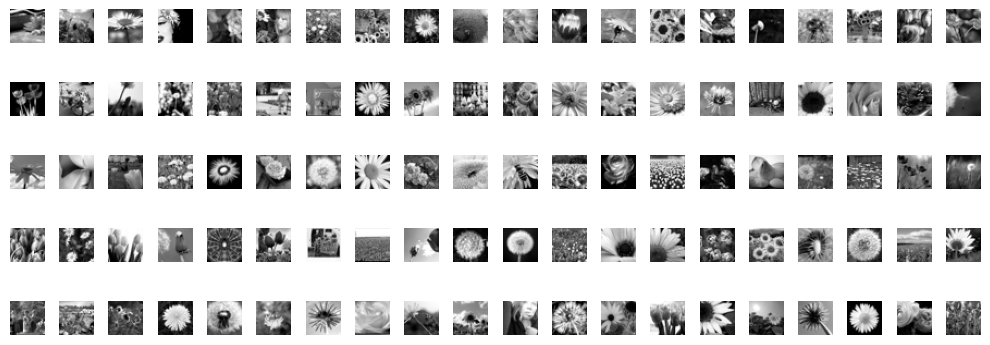

In [30]:
# Directorios de entrada y salida
input_dir = "./fotosGris/"
output_dir = "./fotosGris/"

# Crear la carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Tamaño deseado para las imágenes cuadradas
desired_size = 1024

# Lista para miniaturas a mostrar
preview_images = []

# Recorrer todas las imágenes
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)

        with Image.open(input_path) as img:
            # Convertir a cuadrada con bordes si es necesario
            square_img = ImageOps.fit(img, (desired_size, desired_size), Image.Resampling.LANCZOS)
            square_img.save(output_path)

            # Generar miniatura para vista previa
            if len(preview_images) < 100:
                thumb = square_img.copy()
                thumb.thumbnail((32, 32))  # Miniatura visible pero pequeña
                preview_images.append(thumb)

print(f"Todas las imágenes se han convertido a cuadradas y guardado en: {output_dir}")

# Mostrar las primeras 100 miniaturas
if preview_images:
    cols = 20
    rows = (len(preview_images) + cols - 1) // cols
    plt.figure(figsize=(10, rows * 0.8))

    for idx, thumb in enumerate(preview_images):
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(thumb, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No se generaron miniaturas.")


# CÓDIGO SIN USAR IA

### Sacar tono gris medio de cada una de las imágenes (tiles)

In [18]:
# Carpeta donde están las imágenes en escala de grises
input_dir = "./fotosGris/"

# Diccionario para llevar control de los nombres ya usados
name_counter = {}

# Procesar cada imagen en la carpeta
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Extensiones soportadas
        input_path = os.path.join(input_dir, file_name)
        
        # Abrir la imagen y calcular su gris medio
        with Image.open(input_path) as img:
            # Convertir a numpy array para calcular el promedio
            img_array = np.array(img)
            mean_gray = int(np.mean(img_array))  # Gris medio redondeado
            
        # Crear un nombre basado en el gris medio
        if mean_gray in name_counter:
            name_counter[mean_gray] += 1
        else:
            name_counter[mean_gray] = 1
        
        # Crear el nuevo nombre
        new_name = f"{mean_gray}_{name_counter[mean_gray]}.jpg"
        output_path = os.path.join(input_dir, new_name)
        
        # Renombrar la imagen
        os.rename(input_path, output_path)

print(f"Las imágenes han sido renombradas en la carpeta: {input_dir}")

Las imágenes han sido renombradas en la carpeta: ./fotosGris/


### Histograma de tonalidades grises de las imágenes (tiles)

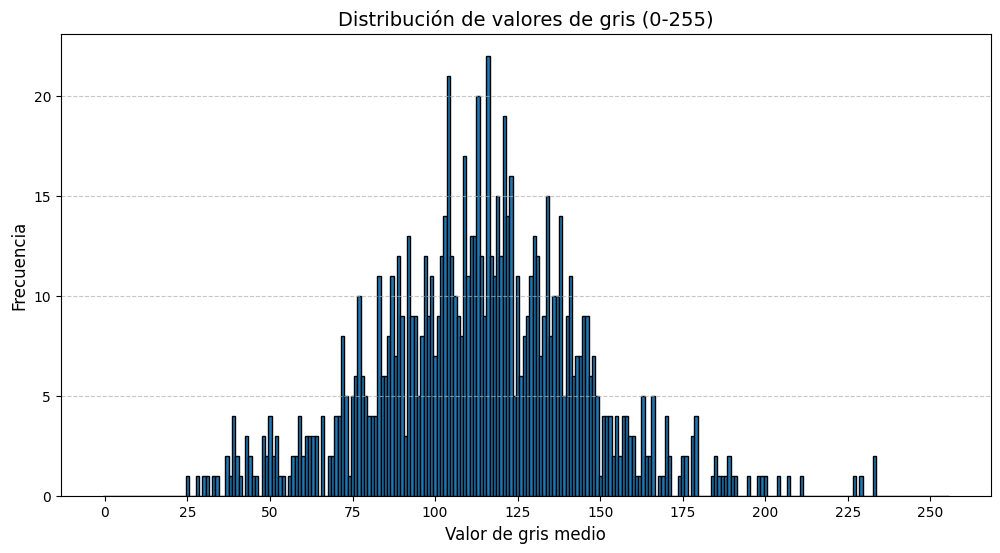

In [19]:
# Carpeta donde están las imágenes renombradas
input_dir = "./fotosGris/"

# Lista para almacenar los valores de gris
gray_values = []

# Recorrer todos los archivos de la carpeta
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Extensiones soportadas
        # Extraer el valor del gris medio del nombre (antes del guión bajo "_")
        gray_value = int(file_name.split('_')[0])
        gray_values.append(gray_value)

# Contar la frecuencia de cada valor de gris
gray_counter = Counter(gray_values)

# Asegurarse de incluir todas las tonalidades de 0 a 255, incluso con frecuencia 0
full_gray_range = {i: gray_counter.get(i, 0) for i in range(256)}

# Generar el histograma
plt.figure(figsize=(12, 6))
plt.bar(full_gray_range.keys(), full_gray_range.values(), width=1.0, edgecolor="black")
plt.title("Distribución de valores de gris (0-255)", fontsize=14)
plt.xlabel("Valor de gris medio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(0, 256, 25))  # Ajusta la densidad de las etiquetas en el eje X
plt.show()

### Homogeneizar la distribución de grises mediante ecualización dinámica y normalización automática 

In [20]:
# Carpeta de entrada (las imágenes serán ajustadas y renombradas)
input_dir = "./fotosGris/"

# Función para calcular la nueva distribución homogénea
def calculate_target_values(current_values, target_range=(0, 255)):
    """
    Redistribuye los valores actuales (gris medios) homogéneamente en el rango objetivo.
    """
    num_values = len(current_values)
    return np.linspace(target_range[0], target_range[1], num_values).astype(int)

# Función para ajustar la tonalidad gris media de una imagen
def adjust_image_to_target(img, current_gray, target_gray):
    """
    Ajusta el gamma de la imagen para cambiar su gris medio al valor objetivo.
    """
    adjustment_factor = target_gray / current_gray if current_gray != 0 else 1
    adjusted_img = np.clip(img * adjustment_factor, 0, 255).astype(np.uint8)
    return adjusted_img

# Listar todas las imágenes en la carpeta
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Leer las tonalidades grises actuales desde los nombres de los archivos
current_gray_values = [int(f.split('_')[0]) for f in image_files]

# Calcular la nueva distribución homogénea
target_gray_values = calculate_target_values(current_gray_values)

# Diccionario para evitar duplicados en los nombres
name_counter = {}

# Procesar cada imagen
for file_name, current_gray, target_gray in zip(image_files, current_gray_values, target_gray_values):
    input_path = os.path.join(input_dir, file_name)
    
    # Leer la imagen en escala de grises
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    
    # Ajustar la imagen al nuevo valor de gris medio
    adjusted_img = adjust_image_to_target(img, current_gray, target_gray)
    
    # Crear un nombre único basado en el nuevo valor de gris medio
    if target_gray in name_counter:
        name_counter[target_gray] += 1
    else:
        name_counter[target_gray] = 1
    new_file_name = f"{target_gray}_{name_counter[target_gray]}.png"
    new_path = os.path.join(input_dir, new_file_name)
    
    # Guardar la imagen ajustada con el nuevo nombre
    cv2.imwrite(new_path, adjusted_img)
    
    # Eliminar el archivo original
    if input_path != new_path:
        os.remove(input_path)

print(f"Las imágenes han sido redistribuidas homogéneamente y renombradas en: {input_dir}")

Las imágenes han sido redistribuidas homogéneamente y renombradas en: ./fotosGris/


### Histograma de tonalidades grises de las imágenes (tiles) homogeneizado

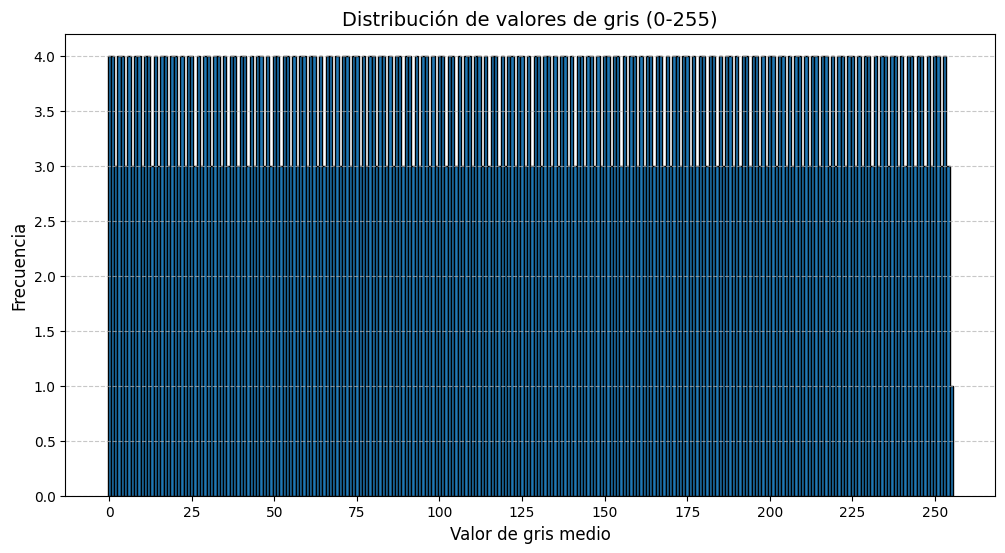

In [21]:
# Carpeta donde están las imágenes renombradas
input_dir = "./fotosGris/"  # Cambia esto a la ruta de tu carpeta

# Lista para almacenar los valores de gris
gray_values = []

# Recorrer todos los archivos de la carpeta
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Extensiones soportadas
        # Extraer el valor del gris medio del nombre (antes del guión bajo "_")
        gray_value = int(file_name.split('_')[0])
        gray_values.append(gray_value)

# Contar la frecuencia de cada valor de gris
gray_counter = Counter(gray_values)

# Asegurarse de incluir todas las tonalidades de 0 a 255, incluso con frecuencia 0
full_gray_range = {i: gray_counter.get(i, 0) for i in range(256)}

# Generar el histograma
plt.figure(figsize=(12, 6))
plt.bar(full_gray_range.keys(), full_gray_range.values(), width=1.0, edgecolor="black")
plt.title("Distribución de valores de gris (0-255)", fontsize=14)
plt.xlabel("Valor de gris medio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(0, 256, 25))  # Ajusta la densidad de las etiquetas en el eje X
plt.show()

### Dividir las areas de la imagen (target) para sacar las tonalidades medias

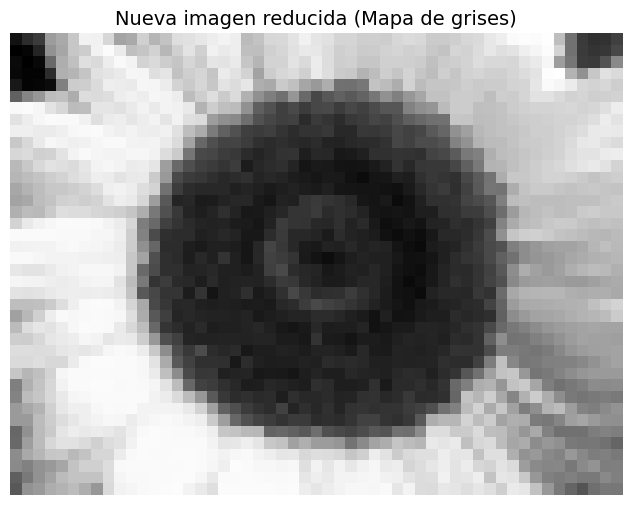

La nueva imagen reducida ha sido guardada en: fotoGris_reducida.jpg
Nuevas dimensiones: 40x53
Tamaño de bloque utilizado: 24x24


In [22]:
# Ruta de la imagen en escala de grises
image_path = "fotoGris.jpg"  # Cambia esta ruta

# Leer la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Número total de áreas deseadas
num_areas = 2000  # Cambia este valor según lo necesites

# Calcular las dimensiones de los bloques
height, width = image.shape
block_size = int(np.sqrt((height * width) / num_areas))  # Tamaño aproximado de los bloques
block_size = max(1, block_size)  # Asegurar que sea al menos 1 píxel

# Dimensiones de la nueva imagen
new_height = height // block_size
new_width = width // block_size

# Crear una nueva imagen reducida
reduced_image = np.zeros((new_height, new_width), dtype=np.uint8)

# Dividir la imagen en bloques y calcular la tonalidad gris media
for i in range(new_height):
    for j in range(new_width):
        # Calcular los límites del bloque en la imagen original
        y_start, y_end = i * block_size, (i + 1) * block_size
        x_start, x_end = j * block_size, (j + 1) * block_size
        
        # Extraer el bloque y calcular su gris medio
        block = image[y_start:y_end, x_start:x_end]
        mean_value = np.mean(block)
        
        # Asignar el valor medio al píxel correspondiente en la nueva imagen
        reduced_image[i, j] = int(mean_value)

# Guardar la nueva imagen reducida
reduced_image_path = "fotoGris_reducida.jpg"  # Cambia esto a la ruta donde quieras guardar
cv2.imwrite(reduced_image_path, reduced_image)

# Mostrar la nueva imagen generada (opcional para visualización)
plt.figure(figsize=(10, 6))
plt.title("Nueva imagen reducida (Mapa de grises)", fontsize=14)
plt.imshow(reduced_image, cmap='gray')
plt.axis("off")
plt.show()

print(f"La nueva imagen reducida ha sido guardada en: {reduced_image_path}")
print(f"Nuevas dimensiones: {new_height}x{new_width}")
print(f"Tamaño de bloque utilizado: {block_size}x{block_size}")

### Creación del fotomosaico

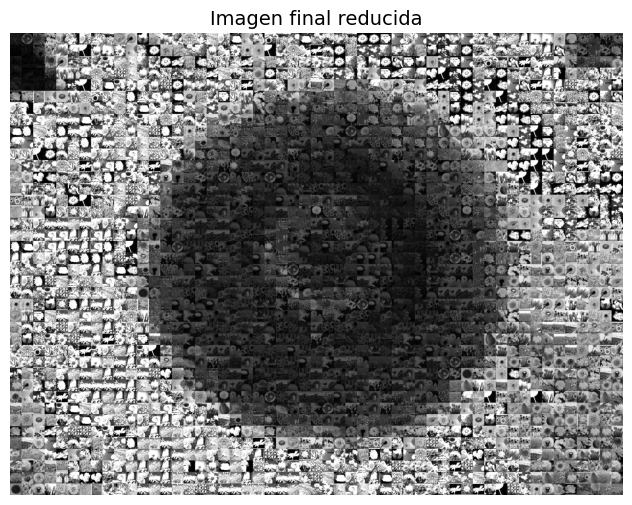

Imagen final guardada como: imagenFinal.jpg
Versión reducida guardada como: imagenFinal_reducida.jpg


In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Rutas
reduced_image_path = "fotoGris_reducida.jpg"
images_dir = "./fotosGris/"
output_image_path = "imagenFinal.jpg"
output_reduced_path = "imagenFinal_reducida.jpg"  # <- Nueva imagen reducida

# Leer la imagen reducida
reduced_image = cv2.imread(reduced_image_path, cv2.IMREAD_GRAYSCALE)
reduced_height, reduced_width = reduced_image.shape

# Cargar imágenes de la carpeta
image_map = {}
for file_name in os.listdir(images_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            gray_value = int(file_name.split('_')[0])
            image_path = os.path.join(images_dir, file_name)
            image_map[gray_value] = cv2.imread(image_path)
        except:
            print(f"Archivo ignorado: {file_name} (nombre no válido)")

# Dimensiones de un bloque
example_image = next(iter(image_map.values()))
tile_height, tile_width, _ = example_image.shape

# Crear imagen final
final_image_height = reduced_height * tile_height
final_image_width = reduced_width * tile_width
final_image = np.zeros((final_image_height, final_image_width, 3), dtype=np.uint8)

def find_closest_gray(value, keys):
    return min(keys, key=lambda x: abs(x - value))

# Construir el mosaico
image_map_keys = list(image_map.keys())
for i in range(reduced_height):
    for j in range(reduced_width):
        gray_value = int(reduced_image[i, j])
        if gray_value in image_map:
            tile_image = image_map[gray_value]
        else:
            closest_gray = find_closest_gray(gray_value, image_map_keys)
            tile_image = image_map[closest_gray]
        y_start, y_end = i * tile_height, (i + 1) * tile_height
        x_start, x_end = j * tile_width, (j + 1) * tile_width
        final_image[y_start:y_end, x_start:x_end] = tile_image

# Guardar imagen final en tamaño completo
cv2.imwrite(output_image_path, final_image)

# Redimensionar la imagen final para crear una versión más liviana
scale_factor = 0.075  # Puedes ajustar esto según lo necesario
reduced_final_image = cv2.resize(final_image, (0, 0), fx=scale_factor, fy=scale_factor)
cv2.imwrite(output_reduced_path, reduced_final_image)

# Mostrar la imagen reducida (para visualización rápida)
plt.figure(figsize=(10, 6))
plt.title("Imagen final reducida", fontsize=14)
plt.imshow(cv2.cvtColor(reduced_final_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print(f"Imagen final guardada como: {output_image_path}")
print(f"Versión reducida guardada como: {output_reduced_path}")


### Añadir una superposición tenue de la imagen (target) en el fotomosaico

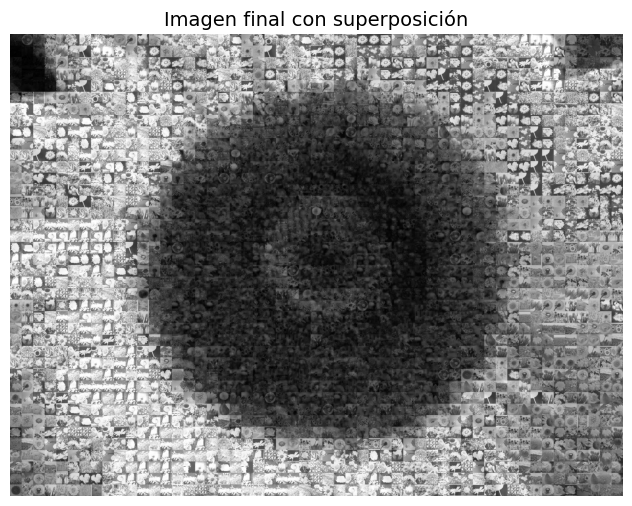

La imagen con superposición ha sido guardada en: imagenFinal_superpuesta.jpg


In [24]:
# Rutas de las imágenes
mosaic_image_path = "imagenFinal_reducida.jpg"  # Imagen mosaico resultante
original_gray_image_path = "fotoGris.jpg"  # Imagen gris original

# Leer las imágenes
mosaic_image = cv2.imread(mosaic_image_path, cv2.IMREAD_GRAYSCALE)
original_gray_image = cv2.imread(original_gray_image_path, cv2.IMREAD_GRAYSCALE)

# Asegurar que las dimensiones coincidan
original_gray_image_resized = cv2.resize(original_gray_image, (mosaic_image.shape[1], mosaic_image.shape[0]))

# Aumentar el contraste de la imagen original para resaltar los trazos y sombras
equ_original_gray = cv2.equalizeHist(original_gray_image_resized)

# Mezclar las dos imágenes con transparencia
alpha = 0.25  # Nivel de transparencia para la imagen original (ajustable)
blended_image = cv2.addWeighted(mosaic_image, 0.375, equ_original_gray, alpha, 0)

# Guardar la imagen final
output_path = "imagenFinal_superpuesta.jpg"
cv2.imwrite(output_path, blended_image)

# Mostrar la imagen resultante
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Imagen final con superposición", fontsize=14)
plt.imshow(blended_image, cmap='gray')
plt.axis("off")
plt.show()

print(f"La imagen con superposición ha sido guardada en: {output_path}")

### Creación de la imagen final usando IA

Epoch 1/300
8/8 [==============================] - 3s 319ms/step - loss: 0.0502 - lr: 1.0000e-04
Epoch 2/300
8/8 [==============================] - 3s 314ms/step - loss: 0.0259 - lr: 1.0000e-04
Epoch 3/300
8/8 [==============================] - 3s 332ms/step - loss: 0.0188 - lr: 1.0000e-04
Epoch 4/300
8/8 [==============================] - 3s 310ms/step - loss: 0.0153 - lr: 1.0000e-04
Epoch 5/300
8/8 [==============================] - 3s 434ms/step - loss: 0.0131 - lr: 1.0000e-04
Epoch 6/300
8/8 [==============================] - 5s 548ms/step - loss: 0.0119 - lr: 1.0000e-04
Epoch 7/300
8/8 [==============================] - 3s 343ms/step - loss: 0.0110 - lr: 1.0000e-04
Epoch 8/300
8/8 [==============================] - 4s 444ms/step - loss: 0.0105 - lr: 1.0000e-04
Epoch 9/300
8/8 [==============================] - 3s 360ms/step - loss: 0.0100 - lr: 1.0000e-04
Epoch 10/300
8/8 [==============================] - 4s 557ms/step - loss: 0.0097 - lr: 1.0000e-04
Epoch 11/300
8/8 [===========

100%|██████████| 4144/4144 [33:17<00:00,  2.07it/s] 


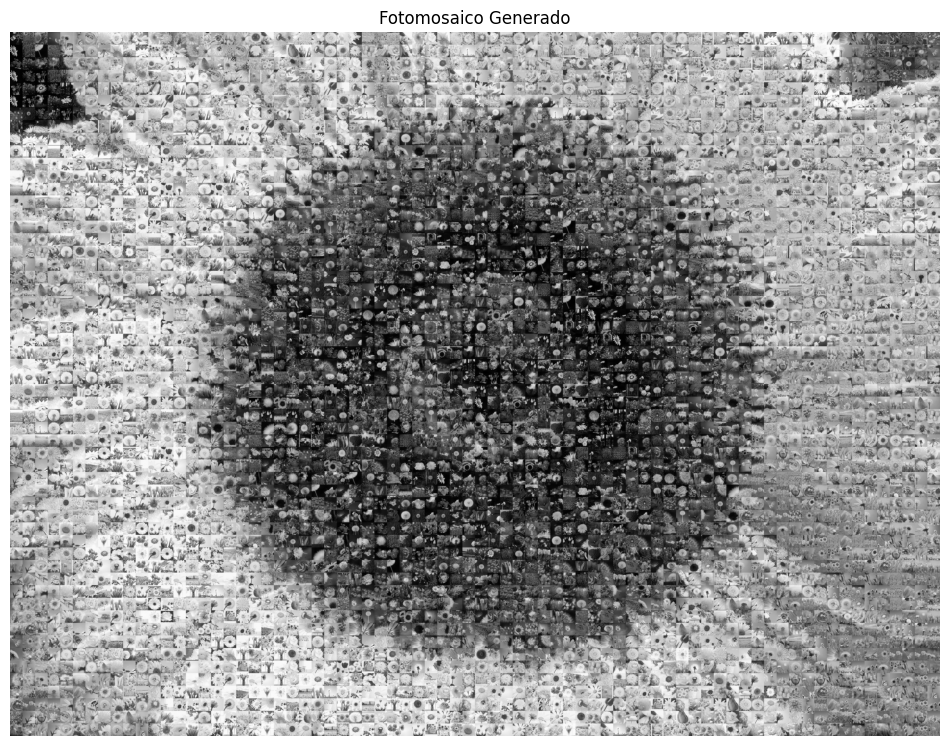

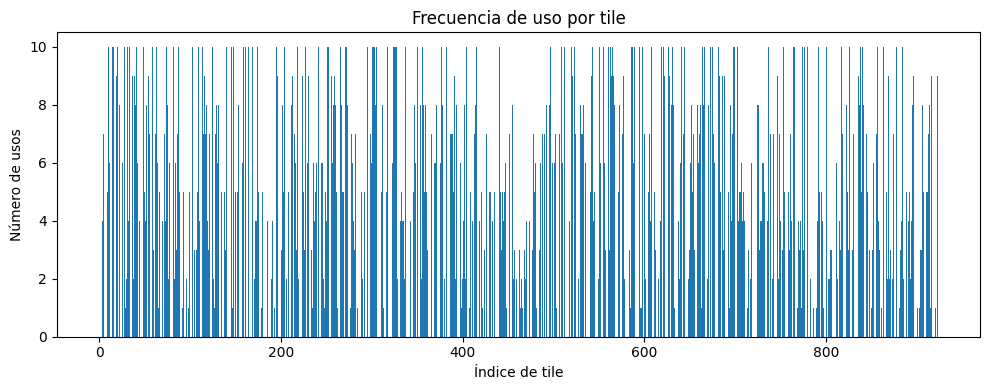

In [37]:
# --- Configuración global del mosaico ---
TILE_SIZE = 128                          # Tamaño de cada tile (en píxeles)
DESIRED_NUM_BLOCKS = 4250                # Número aproximado de bloques que tendrá la imagen objetivo
MAX_USAGE_RATIO = 2.0                    # Cuántas veces máximo se puede usar una misma tile (por balance)
RUTA_IMAGEN_OBJETIVO = 'fotoGris.jpg'   # Imagen en escala de grises con la que se construye el mosaico
CARPETA_TILES = 'fotosGris'             # Carpeta que contiene las tiles (ya en escala de grises)
SALIDA = 'fotomosaico_resultado.jpg'    # Nombre del archivo final de salida

# --- Construcción del modelo autoencoder y encoder ---
def build_autoencoder():
    # Entrada con tamaño TILE_SIZE x TILE_SIZE y 1 canal (escala de grises)
    inp = Input(shape=(TILE_SIZE, TILE_SIZE, 1))

    # Codificador (encoder)
    x = Conv2D(64, 3, padding='same')(inp)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D(2, padding='same')(x)  # Reduce a 64x64

    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D(2, padding='same')(x)  # Reduce a 32x32

    x = Dropout(0.3)(x)
    x = Conv2D(256, 3, padding='same')(x)   # Representación latente
    x = BatchNormalization()(x)
    encoded = LeakyReLU()(x)

    # Decodificador (decoder)
    x = UpSampling2D(2)(encoded)
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D(2)(x)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)  # Salida reconstruida

    # Creamos los modelos
    autoencoder = Model(inp, decoded)
    encoder = Model(inp, encoded)

    # Compilamos con optimizador Adam y función de pérdida MSE
    autoencoder.compile(optimizer=Adam(1e-4), loss='mse')
    return autoencoder, encoder

# --- Carga todas las tiles en escala de grises, ajustándolas al tamaño deseado ---
def load_gray_tiles(folder):
    tiles = []
    for fname in sorted(os.listdir(folder)):
        path = os.path.join(folder, fname)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            resized = cv2.resize(img, (TILE_SIZE, TILE_SIZE))
            tiles.append(resized)
    return np.array(tiles)

# --- Divide una imagen en bloques TILE_SIZE x TILE_SIZE ---
def split_blocks(img):
    h, w = img.shape
    blocks = []
    for y in range(0, h, TILE_SIZE):
        for x in range(0, w, TILE_SIZE):
            tile = img[y:y+TILE_SIZE, x:x+TILE_SIZE]
            if tile.shape == (TILE_SIZE, TILE_SIZE):
                blocks.append(((y, x), tile))
    return blocks

# --- Mejora local del contraste para darle más presencia al tile ---
def stretch_soft_bimodal(tile, target_min=0, target_max=200):
    tile = tile.astype(np.float32)
    tile_min = tile.min()
    tile_max = tile.max()

    # Si todos los píxeles son iguales, devolvemos un valor medio fijo
    if tile_max == tile_min:
        return np.full_like(tile, (target_min + target_max) / 2 / 255.0)

    center = (tile_min + tile_max) / 2.0
    correction = np.zeros_like(tile)

    # Ajuste para parte oscura
    low_mask = tile < center
    correction[low_mask] = (tile[low_mask] - tile_min) / (center - tile_min + 1e-5)
    correction[low_mask] = target_min + correction[low_mask] * (center - target_min)

    # Ajuste para parte clara
    high_mask = tile >= center
    correction[high_mask] = (tile[high_mask] - center) / (tile_max - center + 1e-5)
    correction[high_mask] = center + correction[high_mask] * (target_max - center)

    # Normalizamos a [0.0, 1.0]
    corrected = np.clip(correction, 0, 255) / 255.0
    return corrected

# --- Ensamblaje del mosaico final con orden aleatorio de bloques ---
def build_mosaic_fast(blocks, block_feats, tile_features, tile_images, original_img, alpha_blend=0.2):
    h_blocks = max(y for (y, _), _ in blocks) // TILE_SIZE + 1
    w_blocks = max(x for (_, x), _ in blocks) // TILE_SIZE + 1
    num_blocks = len(blocks)
    num_tiles = len(tile_images)
    
    # Cálculo del uso máximo permitido por tile
    avg_usage = ceil(num_blocks / num_tiles)
    max_usage = int(avg_usage * MAX_USAGE_RATIO)
    usage = np.zeros(num_tiles, dtype=int)

    # Matriz para llevar seguimiento de qué tile se colocó en cada bloque
    placed_tiles = -np.ones((h_blocks, w_blocks), dtype=int)
    mosaic = np.zeros((h_blocks * TILE_SIZE, w_blocks * TILE_SIZE), dtype=np.float32)

    # Mezclamos aleatoriamente el orden en el que se colocarán los bloques
    block_data = list(zip(blocks, block_feats))
    random.shuffle(block_data)  # Aleatoriedad para variedad

    for ((y_pos, x_pos), block_img), block_feat in tqdm(block_data):
        dists = cosine_distances([block_feat], tile_features)[0]
        penalized = dists + (usage / max_usage) * 0.3  # Penalización para limitar uso excesivo
        sorted_idx = np.argsort(penalized)

        h_idx = y_pos // TILE_SIZE
        w_idx = x_pos // TILE_SIZE

        # Función para evitar que tiles iguales estén demasiado juntas
        def is_conflicting(candidate_idx):
            for dy in [-1, 0, 1]:
                for dx in [-1, 0, 1]:
                    ny, nx = h_idx + dy, w_idx + dx
                    if 0 <= ny < h_blocks and 0 <= nx < w_blocks:
                        if placed_tiles[ny][nx] == candidate_idx:
                            return True
            return False

        # Elegimos la mejor tile posible
        for tile_idx in sorted_idx:
            if usage[tile_idx] < max_usage and not is_conflicting(tile_idx):
                best_idx = tile_idx
                break
        else:
            best_idx = sorted_idx[0]  # fallback si no se cumple ninguna condición

        placed_tiles[h_idx][w_idx] = best_idx
        usage[best_idx] += 1

        tile = tile_images[best_idx].squeeze()
        block = block_img.astype(np.float32) / 255.0

        # Ajuste de brillo para que tile se parezca más al bloque
        brightness_adjustment = (block.mean() - tile.mean()) * 0.1
        tile = np.clip(tile + brightness_adjustment, 0.0, 1.0)

        # Mejora de contraste
        tile = stretch_soft_bimodal(tile * 255)
        mosaic[y_pos:y_pos+TILE_SIZE, x_pos:x_pos+TILE_SIZE] = tile

    # Escalado final y mezcla con imagen original para mejor apariencia
    mosaic = (mosaic * 255).clip(0, 255).astype(np.uint8)
    original_resized = cv2.resize(original_img, (mosaic.shape[1], mosaic.shape[0]))
    final = cv2.addWeighted(mosaic, 1 - alpha_blend, original_resized, alpha_blend, 0)
    return final, usage

# --- Proceso principal del script ---
# 1. Cargamos la imagen de entrada
target = cv2.imread(RUTA_IMAGEN_OBJETIVO, cv2.IMREAD_GRAYSCALE)
h, w = target.shape

# 2. Redimensionamos la imagen objetivo según proporción y bloques deseados
aspect_ratio = w / h
num_blocks_h = int(np.sqrt(DESIRED_NUM_BLOCKS / aspect_ratio))
num_blocks_w = int(num_blocks_h * aspect_ratio)
target_resized = cv2.resize(target, (num_blocks_w * TILE_SIZE, num_blocks_h * TILE_SIZE))

# 3. Dividimos la imagen en bloques
blocks = split_blocks(target_resized)

# 4. Cargamos las tiles preparadas
tile_imgs = load_gray_tiles(CARPETA_TILES)
if tile_imgs.shape[0] == 0:
    raise ValueError("No se encontraron tiles válidas.")

# 5. Preprocesamos: normalizamos y agregamos dimensión canal
tile_imgs = tile_imgs.astype(np.float32) / 255.0
tile_imgs = tile_imgs[..., np.newaxis]

# 6. Entrenamos el autoencoder con las tiles para aprender sus representaciones
autoencoder, encoder = build_autoencoder()
autoencoder.fit(
    tile_imgs, tile_imgs,
    epochs=300,
    batch_size=128,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
    ]
)

# 7. Codificamos las features latentes de tiles y bloques
tile_feats = encoder.predict(tile_imgs, batch_size=128).reshape(len(tile_imgs), -1)
tile_feats /= np.linalg.norm(tile_feats, axis=1, keepdims=True) + 1e-8

block_imgs = np.array([b for (_, b) in blocks], dtype=np.float32) / 255.0
block_imgs = block_imgs[..., np.newaxis]
block_feats = encoder.predict(block_imgs, batch_size=128).reshape(len(blocks), -1)
block_feats /= np.linalg.norm(block_feats, axis=1, keepdims=True) + 1e-8

# 8. Construimos el mosaico
resultado, usage = build_mosaic_fast(blocks, block_feats, tile_feats, tile_imgs, target_resized)

# 9. Guardamos el resultado
cv2.imwrite(SALIDA, resultado)

# 10. Mostramos por pantalla el resultado
plt.figure(figsize=(12, 12))
plt.imshow(resultado, cmap='gray')
plt.title("Fotomosaico Generado")
plt.axis('off')
plt.show()

# 11. Gráfico de barras: frecuencia de uso por tile
plt.figure(figsize=(10, 4))
plt.bar(range(len(usage)), usage)
plt.title("Frecuencia de uso por tile")
plt.xlabel("Índice de tile")
plt.ylabel("Número de usos")
plt.tight_layout()
plt.show()


### Comparación de los resultados sin IA y con IA de la imagen (target) en el fotomosaico

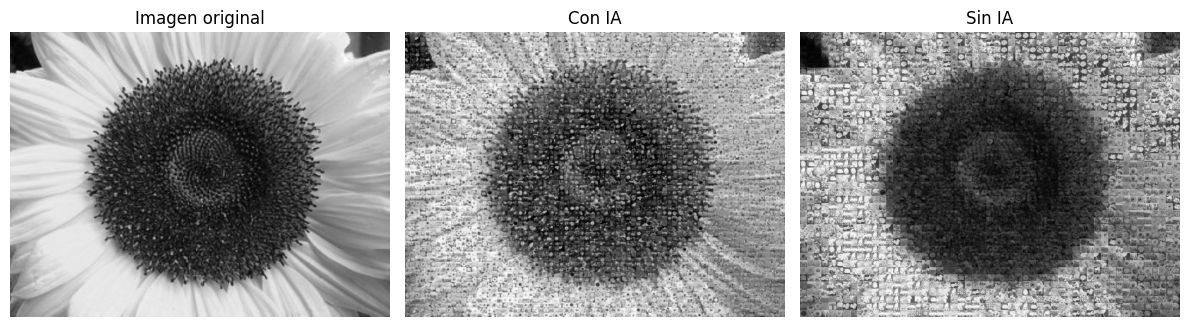

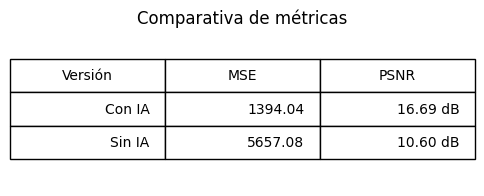

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Función para calcular PSNR manualmente
def calculate_psnr(img1, img2):
    mse_val = mean_squared_error(img1.flatten(), img2.flatten())
    if mse_val == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse_val))

# Cargar imágenes en escala de grises
original = cv2.imread("fotoGris.jpg", cv2.IMREAD_GRAYSCALE)
con_ia = cv2.imread("fotomosaico_IA.jpg", cv2.IMREAD_GRAYSCALE)
sin_ia = cv2.imread("imagenFinal_superpuesta.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar a tamaño del original
con_ia = cv2.resize(con_ia, (original.shape[1], original.shape[0]))
sin_ia = cv2.resize(sin_ia, (original.shape[1], original.shape[0]))

# Calcular métricas
mse_ia = mean_squared_error(original.flatten(), con_ia.flatten())
psnr_ia = calculate_psnr(original, con_ia)

mse_clasico = mean_squared_error(original.flatten(), sin_ia.flatten())
psnr_clasico = calculate_psnr(original, sin_ia)

# Mostrar imágenes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(con_ia, cmap='gray')
plt.title("Con IA")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sin_ia, cmap='gray')
plt.title("Sin IA")
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar tabla de métricas
fig, ax = plt.subplots(figsize=(6, 2))
data = [
    ["Con IA", f"{mse_ia:.2f}", f"{psnr_ia:.2f} dB"],
    ["Sin IA", f"{mse_clasico:.2f}", f"{psnr_clasico:.2f} dB"]
]
col_labels = ["Versión", "MSE", "PSNR"]
table = ax.table(cellText=data, colLabels=col_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax.axis('off')
plt.title("Comparativa de métricas")
plt.show()
